<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/simulation/3dgauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D Gauss Visualisation

Based on https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb


## Original source code

In [160]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [161]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

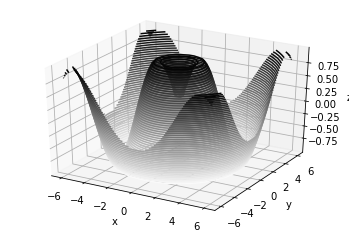

In [162]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Gauss visualisation

$$f\left(x\right) = a e^{- { \frac{\left(x-\mu\right)^2 }{ 2 \sigma^2} } }$$

In [163]:
def gaussfunc(x, y):
  avg = (x * x + y * y) / 10
  result = np.exp(-(avg * avg) / 2)
  return result

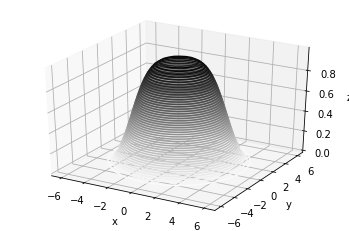

In [164]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = gaussfunc(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [165]:
def gaussCreator(coordX = (-12, 0), coordY = (-6, 6), maxZ = 1):
  xC = (coordX[0] + coordX[1]) / 2
  xK = (coordX[1] - coordX[0]) / 2
  yC = (coordY[0] + coordY[1]) / 2
  yK = (coordY[1] - coordY[0]) / 2
  def gaussfunc(x, y):
    deltaX = (x - np.full_like(x, xC)) / xK 
    deltaY = (y - np.full_like(x, xC)) / yK 
    avg = (deltaX * deltaX + deltaY * deltaY)
    result = np.exp(-(avg * avg) / 2) * maxZ
    return result
  return gaussfunc

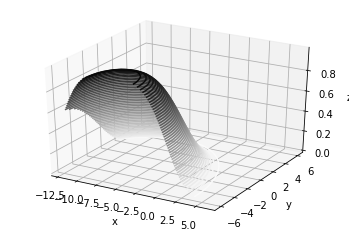

In [166]:
x = np.linspace(-12, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
gf = gaussCreator(coordX = (-12, 0), coordY = (-6, 6), maxZ = 1)
Z = gf(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# Air to air visibility

In [167]:
import math
# https://cs.wikibooks.org/wiki/Geometrie/Rasterizace
def raster(start = (0, 0), end = (100, 100), xstep = 1, ystep = 1):
  deltax = end[0] - start[0]
  deltay = end[1] - start[1]
  m = (deltay / ystep) / (deltax / xstep) # = deltay * xstep / (deltax * ystep)
  absm = abs(m)
  xa = 1 / absm * xstep # deltax / abs(deltay / ystep)
  ya = absm * ystep #deltay / abs(deltax / xstep)
  #if deltax < 0:
  #  xa = -xa
  #if deltay < 0:
  #  ya = -ya
  #print(m, xa, ya, xstep, ystep)
  if (m >= - 1) & (m <= 1):
    # m in <-1; 1>
    #print('x controls', m, deltax, deltay)
    #print( xa, ya)
    cx = start[0]
    cy = start[1]
    yield cx, cy
    if deltax > 0:
      while cx < end[0]:
        cx = cx + xstep
        cy = cy + ya
        yield cx, cy
    else:
      #print('m <= 0')
      while cx > end[0]:
        cx = cx - xstep
        cy = cy + ya
        yield cx, cy
  else:
    cx = start[0]
    cy = start[1]
    yield cx, cy
    if deltay > 0:
      while cy < end[1]:
        cx = cx + xa
        cy = cy + ystep
        yield cx, cy
    else:
      while cy > end[1]:
        cx = cx + xa
        cy = cy - ystep
        yield cx, cy

def raster(start = (0, 0), end = (100, 100), xstep = 1, ystep = 1):
  deltax = end[0] - start[0]
  deltay = end[1] - start[1]

  nstepsx = abs(deltax) / xstep
  nstepsy = abs(deltay) / ystep
  if (nstepx > nstepy):
    ystepbyx = deltay / nstepx
    cx = start[0]
    cy = start[1]
    for i in range(nstepx + 1):
      cx = cx + xstep
      cy = cy + ystepbyx
    while 
  else:
    xstepbyy = deltax / nstepy
    pass


In [168]:
rasterized = raster(start = (0, 0), end = (10, 10), xstep = 1, ystep = 0.5)
#rasterized = raster(start = (0, 0), end = (10, 10), xstep = 0.5, ystep = 1)
#rasterized = raster(start = (10, 30), end = (0, 0), xstep = 0.5, ystep = 1)
#rasterized = raster(start = (10, 30), end = (0, 0), xstep = 0.5, ystep = 1)
#rasterized = raster(start = (10, 0), end = (0, 10), xstep = 0.5, ystep = 1)
rasterized = raster(start = (30, 0), end = (0, 10), xstep = 0.5, ystep = 1)
for index, point in enumerate(rasterized):
  print(index, point)

0 (30, 0)
1 (29.5, 0.16666666666666666)
2 (29.0, 0.3333333333333333)
3 (28.5, 0.5)
4 (28.0, 0.6666666666666666)
5 (27.5, 0.8333333333333333)
6 (27.0, 0.9999999999999999)
7 (26.5, 1.1666666666666665)
8 (26.0, 1.3333333333333333)
9 (25.5, 1.5)
10 (25.0, 1.6666666666666667)
11 (24.5, 1.8333333333333335)
12 (24.0, 2.0)
13 (23.5, 2.1666666666666665)
14 (23.0, 2.333333333333333)
15 (22.5, 2.4999999999999996)
16 (22.0, 2.666666666666666)
17 (21.5, 2.8333333333333326)
18 (21.0, 2.999999999999999)
19 (20.5, 3.1666666666666656)
20 (20.0, 3.333333333333332)
21 (19.5, 3.4999999999999987)
22 (19.0, 3.666666666666665)
23 (18.5, 3.8333333333333317)
24 (18.0, 3.9999999999999982)
25 (17.5, 4.166666666666665)
26 (17.0, 4.333333333333332)
27 (16.5, 4.499999999999999)
28 (16.0, 4.666666666666666)
29 (15.5, 4.833333333333333)
30 (15.0, 5.0)
31 (14.5, 5.166666666666667)
32 (14.0, 5.333333333333334)
33 (13.5, 5.500000000000001)
34 (13.0, 5.666666666666668)
35 (12.5, 5.833333333333335)
36 (12.0, 6.00000000000

In [169]:
def checkVisibility(start = (0, 0), end = (100, 100), z = lambda x, y: 0, xstep = 1, ystep = 1):
  rasterized = raster(start = start, end = end, xstep = xstep, ystep = ystep)
  startZ = z(*start) + 1 # nadmorska vyska pocatku
  endZ = z(*end) + 1 # nadmorska vyska konce
  deltaX = end[0] - start[0]
  deltaY = end[1] - start[1]
  deltaZ = endZ - startZ
  linesightZ = lambda x, y: (x - start[0]) / deltaX * deltaZ + startZ
  result = True
  for index, point in enumerate(rasterized):
    cz = z(*point)
    lsz = linesightZ(*point)
    if lsz < cz:
      result = False
      print(index, cz, lsz)
      break
  #return True, end
  #print(index, cz, lsz)
  return result, point
  


In [170]:
import math
import matplotlib.pyplot as plt

terrain = gaussCreator()
#terrain = lambda x, y: 0

distance = 10
angle = 0
angleSegments = 64
deltaAngle = 2 * math.pi / angleSegments
borderX = []
borderY = []
for index in range(angleSegments + 1):
  startPoint = (0, 0)
  endPoint = (distance * math.cos(angle), distance * math.sin(angle))
  visible, point = checkVisibility(startPoint, endPoint, terrain)
  borderX.append(point[0])
  borderY.append(point[1])
  angle = angle + deltaAngle

plt.plot(borderX, borderY)
plt.grid(which='both')
print(borderX)
print(borderY)

ZeroDivisionError: ignored